# Intro to Pandas

Pandas is the premier open-source data manipulation and analysis library for Python. It is used extensively in the data science world - and for good reason!

It is well-suited for many different kinds of data sets, and provides a wide variety of functionality that makes working with your data simple, yet powerful. At the core of Pandas, there are two primary data structures:

- Series (1-dimensional)
- DataFrame (2-dimensional)

With this in mind, let's dive right in.

In [1]:
# Start by importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Series

In [4]:
# Creating a Series is easy - just pass in a list of values
values = [4, 56, 2, 45.6, np.nan, 23] # np.nan returns a null object (Not a Number)
s = pd.Series(values)
s

0     4.0
1    56.0
2     2.0
3    45.6
4     NaN
5    23.0
dtype: float64

In [3]:
# Notice above how pandas creates an index for our series (0-5 in this case), 
# and converts our data to a standard type (float64)

In [4]:
# We can use the describe method to inspect our data easily
s.describe()

count     5.000000
mean     26.120000
std      24.254319
min       2.000000
25%       4.000000
50%      23.000000
75%      45.600000
max      56.000000
dtype: float64

In [5]:
# And we can access values using standard Python indexing
print(s[0])
print(s[3:5])
print(s[-5:])

4.0
3    45.6
4     NaN
dtype: float64
1    56.0
2     2.0
3    45.6
4     NaN
5    23.0
dtype: float64


In [8]:
# Getting rid of null values is easy too
s_nonulls = s.dropna()
s_nonulls

0     4.0
1    56.0
2     2.0
3    45.6
5    23.0
dtype: float64

In [10]:
# Or, we can fill nulls with a default value
s_filled = s.fillna(0)
s_filled

0     4.0
1    56.0
2     2.0
3    45.6
4     0.0
5    23.0
dtype: float64

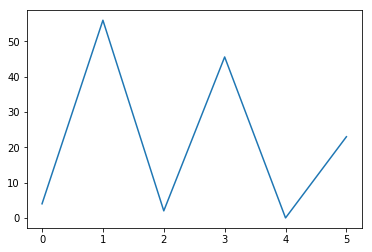

In [11]:
# Using matplotlib, let's plot the data
# By default, the indices will be on the x-axis, and values on the y-axis
s_filled.plot()
plt.show()

## DataFrame

In [12]:
# While a Series can be created using a list, a DataFrame can easily be created using a dictionary,
# where the keys are columns, and values are the rows.
# The values can be either 'scalars' or any number of container types (arrays, lists, series, etc...)
data_dict = {
    'A': np.array([1, 2, 3, 4]),
    'B': 'foo',
    'C': pd.Series(['can', 'of', 'tuna', 'fish']),
    'D': [13.5, 15.3, np.nan, 10.72]
}

df = pd.DataFrame(data_dict)
df

,A,B,C,D
0,1,foo,can,13.50
1,2,foo,of,15.30
2,3,foo,tuna,NaN
3,4,foo,fish,10.72


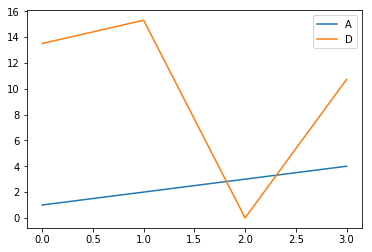

In [16]:
# Try out some of the methods we used above on the df - do they work the same?

#df.describe()

#df_nonulls = df.dropna()
#df_nonulls

#df_filled = df.fillna(0)
#df_filled

df_filled.plot()
plt.show()

In [17]:
# Again, we can select data using slicing syntax (with some extended features)

# Given a single value, it will return that column as a Series, so use the column name
print(df['A'])
print(df['C'])

0    1
1    2
2    3
3    4
Name: A, dtype: int32
0     can
1      of
2    tuna
3    fish
Name: C, dtype: object


In [18]:
# When given multiple values, it will slice based on the rows/index
print(df[0:2])
print(df[-3:])

   A    B    C     D
0  1  foo  can  13.5
1  2  foo   of  15.3
   A    B     C      D
1  2  foo    of  15.30
2  3  foo  tuna    NaN
3  4  foo  fish  10.72


In [22]:
# Use the loc method for selection by label
df.loc[0:2, ['A', 'C']]

,A,C
0,1,can
1,2,of
2,3,tuna


In [23]:
# And the iloc method for selection by position
df.iloc[0:3, [0, 2]]

,A,C
0,1,can
1,2,of
2,3,tuna


In [26]:
# You can even select using 'Boolean Indexing'
df['A'] > 2

df[df['A'] > 2]

,A,B,C,D
2,3,foo,tuna,NaN
3,4,foo,fish,10.72


In [27]:
df[df['D'] == 10.72]

,A,B,C,D
3,4,foo,fish,10.72


In [29]:
df[df['C'].isin(['can', 'fish'])]

,A,B,C,D
0,1,foo,can,13.50
3,4,foo,fish,10.72


## Time Indexed DataFrames

In [30]:
# Pandas provides a simple way to create data sets using DatetimeIndex.
# An easy way to create one is using the pd.date_range method
dates = pd.date_range('20180114', periods=7)
dates

DatetimeIndex(['2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-20'],
              dtype='datetime64[ns]', freq='D')

In [31]:
temps = {
    'low_tempf':[24, 29, 30, 21, 27, 32, 42],
    'high_tempf': [44, 47, 56, 39, 45, 53, 61]
}
df2 = pd.DataFrame(temps, index=dates)
df2

,high_tempf,low_tempf
2018-01-14,44,24
2018-01-15,47,29
2018-01-16,56,30
2018-01-17,39,21
2018-01-18,45,27
2018-01-19,53,32
2018-01-20,61,42


In [32]:
# See if you can select the high temperature for January 18
df2.loc['2018-01-18', 'high_tempf']

45

In [33]:
# Can you tell me the average low for the week?
df2['low_tempf'].mean()

29.285714285714285

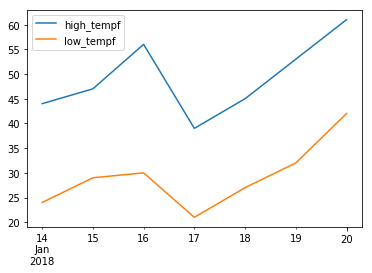

In [34]:
# Plot the temperatures for the week
df2.plot()
plt.show()

## Applying Functions to Your Data

In [35]:
# We can easily add new data to our DataFrame
# Here, I'll add a column called wind_mph, with a value per day
df2['wind_mph'] = [5, 4, 5, 10, 4, 7, 5]
df2

,high_tempf,low_tempf,wind_mph
2018-01-14,44,24,5
2018-01-15,47,29,4
2018-01-16,56,30,5
2018-01-17,39,21,10
2018-01-18,45,27,4
2018-01-19,53,32,7
2018-01-20,61,42,5


In [37]:
# And create a function that will calculate wind chill, which is the 'feels-like' temperature
def wind_chillf(temp, wind, round_n=2):
    '''
    http://www.onlineconversion.com/windchill.htm
    35.74 + 0.6215T - 35.75(V^0.16) + 0.4275T(V^0.16)
    where:
    V = wind (mph)
    T = temp (F)
    '''
    wc = 35.74 + 0.6215 * temp - 35.75 * (wind ** 0.16) + 0.4275 * temp * (wind ** 0.16)
    return round(wc, round_n)

In [38]:
# I can easily run the function against every row of data with a single line
df2['high_windchillf'] = wind_chillf(df2['high_tempf'], df2['wind_mph'])

# Let's add the low windchill too
df2['low_windchillf'] = wind_chillf(df2['low_tempf'], df2['wind_mph'])

df2

,high_tempf,low_tempf,wind_mph,high_windchillf,low_windchillf
2018-01-14,44,24,5,41.17,17.68
2018-01-15,47,29,4,45.40,24.61
2018-01-16,56,30,5,55.27,24.73
2018-01-17,39,21,10,32.40,10.09
2018-01-18,45,27,4,43.09,22.30
2018-01-19,53,32,7,50.80,25.50
2018-01-20,61,42,5,61.14,38.82


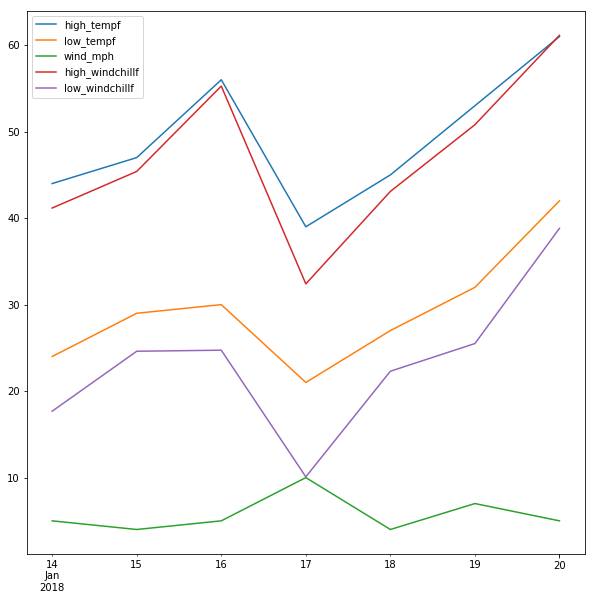

In [39]:
df2.plot(figsize=(10,10))
plt.show()

In [ ]:
# See if you can create high and low columns for the temperatures, converted to celius using this formula:
# celius = fahrenheit - 32 / 1.8

## Reading/Saving Files

In [42]:
# Pandas has some very convenient methods for reading data from files, 
# as well as saving your DataFrames in various formats.

# Let's read in the text file that contains brain v body weight for various mammals.
data_fp = 'data/brain2body.txt'
b2b_df = pd.read_csv(data_fp)

# We can use the head method to view the first 5 rows
b2b_df.head()

,3.385,44.500
0,0.48,15.5
1,1.35,8.1
2,465.00,423.0
3,36.33,119.5
4,27.66,115.0


In [43]:
# Notice how the data did not contain headers - let's try again, this time passing 
# in some keyword arguments
b2b_df = pd.read_csv(data_fp, header=None, names=['brain_weight', 'body_weight'])
b2b_df.head()

,brain_weight,body_weight
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [44]:
# Now, we can save the new data set that includes the headers
new_fp = 'data/brain2body_headers.txt'
b2b_df.to_csv(new_fp, index=False) # Setting index to False will drop the index integers, which is ok in this case

In [45]:
# Let's try with our homes median list price data, which we will want to be time-indexed
mlp_fp = 'data/richmond_median_list_prices.csv'
mlp_df = pd.read_csv(mlp_fp)
mlp_df.head()

,Date,Value2b,Value3b,Value4b,Value5b
0,2013-01-31,74950.0,89900.0,147200.0,229700.0
1,2013-02-28,74900.0,90000.0,144500.0,228851.0
2,2013-03-31,78250.0,92000.0,148000.0,234592.5
3,2013-04-30,77000.0,89900.0,150990.0,225000.0
4,2013-05-31,79900.0,94900.0,154900.0,224950.0


In [46]:
# Hmm...in this case, we want the Date column to be our index, so let's try again
mlp_df = pd.read_csv(mlp_fp, index_col='Date', parse_dates=True)
mlp_df.head()

,Value2b,Value3b,Value4b,Value5b
Date,,,,
2013-01-31,74950.0,89900.0,147200.0,229700.0
2013-02-28,74900.0,90000.0,144500.0,228851.0
2013-03-31,78250.0,92000.0,148000.0,234592.5
2013-04-30,77000.0,89900.0,150990.0,225000.0
2013-05-31,79900.0,94900.0,154900.0,224950.0


In [47]:
# That looks better
# Let's inspect the index to make sure the dates are of the right type
mlp_df.index

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31'],
     

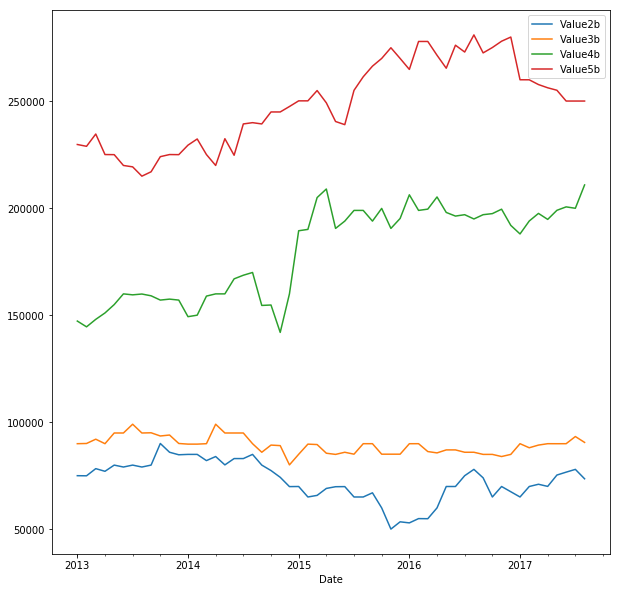

In [48]:
# Sure enough, the read_csv method sucessfully converted our data to use a DatetimeIndex.
# Unlike with plotting numpy arrays, where we had to provide a formatter for diplaying dates,
# pandas is smart enough to do it for us
mlp_df.plot(figsize=(10, 10))
plt.show()

In [50]:
# When using a Datetime Indexed data set, you get some pretty cool 
# new methods for calculating different 'rolling' statistics
mlp_pc = mlp_df.pct_change()
mlp_pc.head()

,Value2b,Value3b,Value4b,Value5b
Date,,,,
2013-01-31,NaN,NaN,NaN,NaN
2013-02-28,-0.000667,0.001112,-0.018342,-0.003696
2013-03-31,0.044726,0.022222,0.024221,0.025088
2013-04-30,-0.015974,-0.022826,0.020203,-0.040890
2013-05-31,0.037662,0.055617,0.025896,-0.000222


In [51]:
# And of course, we can easily save our new data
mlp_pc_fp = 'data/richmond_median_list_prices_percent_change.csv'
mlp_pc.to_csv(mlp_pc_fp, index=True) # Pass index=True to ensure our DatetimeIndex remains in the output